# Imports

In [1]:
import collections
import pandas as pd
import argparse
import time
import numpy as np

In [2]:
import noise_estimator

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm 
import utils

from modified_pendulum_processor import ModifiedPendulumProcessor

from utils import *

# Params

In [5]:
def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameterr
            'max_steps': 75,
            'num_episodes': 100000,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,                       # learning rate of optimizer
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,               # annealing starts at this epsilon
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,                    # discount factor gamma
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 1,
            'surrogate_c_interval_min': 10,
           }

# Experiment with best values

100%|██████████| 100000/100000 [04:07<00:00, 403.84it/s]


Accuracy: 98.002
Mean episode length: 74.38236
Last reward processor:
Estimated confusion matrix:


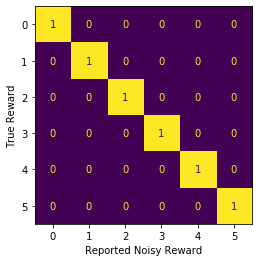

Reward sets:
(0, 0): [-1, -1, -1, -3, -2, -1, -1, 0, -2, -1]
(0, 1): [0, -1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, -2, 0, -1, -1, 0, 0, -1, -1, 0]
(0, 2): [0, -2, 0, 0]
(0, 3): [-2, -1, -2, -2, -2, -2]
(0, 4): [-2, -5, -4, -5, -4]
(0, 5): [-4, -5, -4, -4, -4]
(0, 6): [-5, -5, -5, -3, -4, -5, -5]
Reward set counts:
Key (0, 0): 10 items
Key (0, 1): 37 items
Key (0, 2): 4 items
Key (0, 3): 6 items
Key (0, 4): 5 items
Key (0, 5): 5 items
Key (0, 6): 7 items


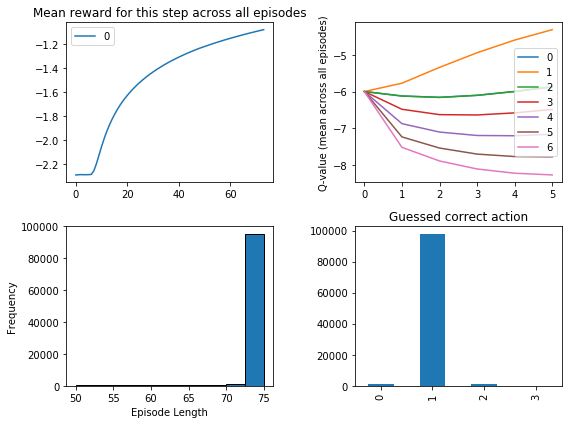

100%|██████████| 100000/100000 [05:06<00:00, 325.98it/s]


Accuracy: 99.76
Mean episode length: 74.22184
Last reward processor:
Estimated confusion matrix:


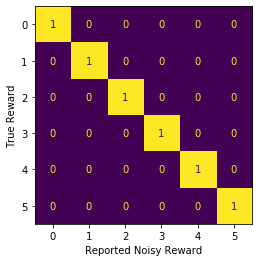

Reward sets:
(0, 0): [0, 0, -2, -1, -1, -1, 0, -1, -1, -2, -3, 0, -1]
(0, 1): [-2, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -2, 0, -1, 0, 0, 0, -1, 0, -1, 0, -1, -1]
(0, 2): [-2, -1, -1, 0, 0, -1]
(0, 3): [-2, -2, -2, -2, -2, -2]
(0, 4): [-2, -3, -3, -1]
(0, 5): [-4, -5, -4, -4, -5]
(0, 6): [-4, -4, -5, -5, -5, -5]
Reward set counts:
Key (0, 0): 13 items
Key (0, 1): 34 items
Key (0, 2): 6 items
Key (0, 3): 6 items
Key (0, 4): 4 items
Key (0, 5): 5 items
Key (0, 6): 6 items


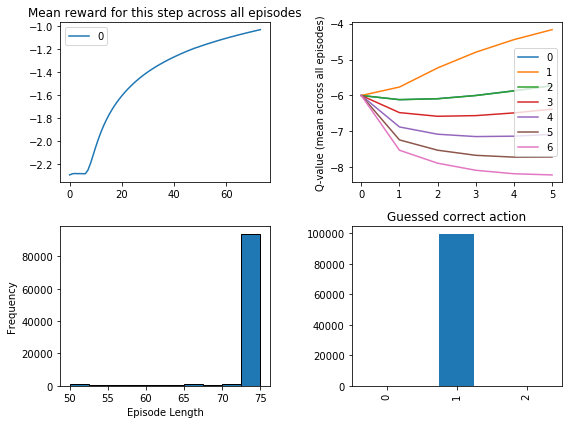

array([-5.72717334, -4.17107118, -5.72801843, -6.38059549, -7.07863071,
       -7.70840065, -8.20706907])

In [6]:
# res = {'target': 99.42999999999999, 'params': {'alpha': 0.12708682895337786, 'alpha_decay': 538.6199305470005, 'alpha_min': 0.3407139712358348, 'epsilon': 0.35959935166361845, 'epsilon_decay': 71.64649449808573, 'epsilon_min': 0.9868919961750783, 'gamma': 0.904542101158647, 'surrogate_c_interval': 19.20687806175444}}
res = {'target': 99.9, 'params': {'alpha': 0.34556072704304774, 'alpha_decay': 397.3707067564393, 'alpha_min': 0.538816734003357, 'epsilon': 0.4191945144032948, 'epsilon_decay': 685.5342808963627, 'epsilon_min': 0.20445224973151743, 'gamma': 0.8781174363909454}}

params = default_params() | res['params']

# params['']

params['plots'] = True
params['noise'] = True
params['surrogate'] = False
plot_mean_q_values(params=params)

params['surrogate'] = True
plot_mean_q_values(params=params)

# Bayesian optimization

In [6]:
from bayes_opt import BayesianOptimization

In [7]:
def objective(
        alpha,
        alpha_decay,
        alpha_min,
        epsilon,
        epsilon_decay,
        epsilon_min,
        gamma,
        # surrogate_c_interval,
        ):
    # # 'surrogate_c_interval': [1, 2, 5, 10, 20, 40]
    # # 'surrogate_lr'    
    # convergence_number_of_consequent_actions
    # intial_q_values: [0, -7]

    # surrogate_c_interval = int(surrogate_c_interval)

    new_params = {
        'alpha': alpha, 
        'alpha_decay': alpha_decay,
        'alpha_min': alpha_min,
        'epsilon': epsilon, 
        'epsilon_decay': epsilon_decay,
        'epsilon_min': epsilon_min,
        'gamma': gamma,
        # 'surrogate_c_interval': surrogate_c_interval,
        #
        'noise': True,
        'surrogate': True,
        # 'diag': 0.9     
    }

    params = default_params() | new_params

    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
    


    # params['surrogate'] = False
    # q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy_no_surrogate, _ = qLearningExperiment(params=params)


    # accuracy = accuracy_surrogate - accuracy_no_surrogate
    
    mean_episode_length = np.mean(episode_lengths)
    print(mean_episode_length)
    # return -mean_episode_length
    return accuracy

optimizer = BayesianOptimization(
    f=objective,
    pbounds={
        'alpha': (0, 1), 
        'alpha_decay': (1, 1000),
        'alpha_min': (0, 1),
        'epsilon': (0, 1), 
        'epsilon_decay': (1, 1000),
        'epsilon_min': (0, 1),
        'gamma': (0, 1),
        # 'surrogate_c_interval': (1, 120)
        },
    random_state=1,
)

# n_iter: How many steps of bayesian optimization you want to perform. 
# The more steps the more likely to find a good maximum you are.
# init_points: How many steps of random exploration you want to perform.
# Random exploration can help by diversifying the exploration space.
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

best_params = optimizer.max['params']

print(optimizer.max)

|   iter    |  target   |   alpha   | alpha_... | alpha_min |  epsilon  | epsilo... | epsilo... |   gamma   |
-------------------------------------------------------------------------------------------------------------


100%|██████████| 1000/1000 [00:02<00:00, 378.81it/s]


60.71
| 1         | 44.0      | 0.417     | 720.6     | 0.0001144 | 0.3023    | 147.6     | 0.09234   | 0.1863    |


100%|██████████| 1000/1000 [00:02<00:00, 339.55it/s]


74.19
| 2         | 99.9      | 0.3456    | 397.4     | 0.5388    | 0.4192    | 685.5     | 0.2045    | 0.8781    |


100%|██████████| 1000/1000 [00:02<00:00, 344.99it/s]


73.729
| 3         | 98.4      | 0.02739   | 670.8     | 0.4173    | 0.5587    | 141.2     | 0.1981    | 0.8007    |


100%|██████████| 1000/1000 [00:02<00:00, 378.07it/s]


75.0
| 4         | 98.9      | 0.9683    | 314.1     | 0.6923    | 0.8764    | 894.7     | 0.08504   | 0.03905   |


100%|██████████| 1000/1000 [00:02<00:00, 347.55it/s]


74.859
| 5         | 83.2      | 0.1698    | 878.3     | 0.09835   | 0.4211    | 957.9     | 0.5332    | 0.6919    |


100%|██████████| 1000/1000 [00:02<00:00, 457.32it/s]


52.378
| 6         | 86.5      | 0.3155    | 686.8     | 0.8346    | 0.01829   | 750.4     | 0.9889    | 0.7482    |


100%|██████████| 1000/1000 [00:03<00:00, 326.94it/s]


74.654
| 7         | 55.8      | 0.2804    | 789.5     | 0.1032    | 0.4479    | 908.7     | 0.2936    | 0.2878    |


100%|██████████| 1000/1000 [00:02<00:00, 349.75it/s]


70.739
| 8         | 31.8      | 0.13      | 20.35     | 0.6788    | 0.2116    | 266.3     | 0.4916    | 0.05336   |


100%|██████████| 1000/1000 [00:02<00:00, 355.89it/s]


74.907
| 9         | 98.9      | 0.5741    | 147.6     | 0.5893    | 0.6998    | 103.2     | 0.4141    | 0.6944    |


100%|██████████| 1000/1000 [00:02<00:00, 386.33it/s]


75.0
| 10        | 97.7      | 0.4142    | 50.9      | 0.5359    | 0.6638    | 515.4     | 0.9446    | 0.5866    |


100%|██████████| 1000/1000 [00:02<00:00, 337.29it/s]


74.036
| 11        | 96.9      | 0.4532    | 395.6     | 0.5729    | 0.2955    | 685.6     | 0.7745    | 0.7397    |


100%|██████████| 1000/1000 [00:02<00:00, 400.92it/s]


75.0
| 12        | 0.0       | 0.0       | 422.3     | 0.06104   | 1.0       | 685.0     | 0.0       | 1.0       |


100%|██████████| 1000/1000 [00:02<00:00, 445.61it/s]


52.967
| 13        | 90.9      | 0.03708   | 306.3     | 0.8085    | 0.02626   | 882.8     | 0.117     | 0.5907    |


100%|██████████| 1000/1000 [00:02<00:00, 387.07it/s]


61.001
| 14        | 53.7      | 0.08871   | 327.6     | 0.4789    | 0.09126   | 885.9     | 0.5951    | 0.06969   |


100%|██████████| 1000/1000 [00:02<00:00, 338.72it/s]


75.0
| 15        | 90.0      | 0.5642    | 310.8     | 0.4775    | 0.4037    | 907.3     | 0.7503    | 0.9975    |


100%|██████████| 1000/1000 [00:03<00:00, 318.94it/s]


74.15
| 16        | 94.5      | 0.9197    | 156.2     | 0.6253    | 0.314     | 114.8     | 0.4902    | 0.1418    |


100%|██████████| 1000/1000 [00:02<00:00, 334.97it/s]


74.076
| 17        | 51.1      | 0.3362    | 164.9     | 0.08737   | 0.3223    | 101.0     | 0.8692    | 0.5435    |


100%|██████████| 1000/1000 [00:03<00:00, 329.41it/s]


70.638
| 18        | 82.6      | 0.9459    | 139.9     | 0.3331    | 0.3406    | 120.4     | 0.1782    | 0.4319    |


100%|██████████| 1000/1000 [00:02<00:00, 365.43it/s]


75.0
| 19        | 0.0       | 0.0       | 657.2     | 0.5466    | 0.5369    | 139.0     | 0.7785    | 0.9819    |


100%|██████████| 1000/1000 [00:02<00:00, 460.13it/s]

50.595
| 20        | 21.4      | 0.2134    | 307.0     | 0.6152    | 0.004913  | 897.1     | 0.3193    | 0.02481   |
{'target': 99.9, 'params': {'alpha': 0.34556072704304774, 'alpha_decay': 397.3707067564393, 'alpha_min': 0.538816734003357, 'epsilon': 0.4191945144032948, 'epsilon_decay': 685.5342808963627, 'epsilon_min': 0.20445224973151743, 'gamma': 0.8781174363909454}}
